# **Import libraries**

In [43]:
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, LabelEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.base import clone
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Loading Dataset**

In [2]:
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mansoordaku/ckdisease",
  "kidney_disease.csv"
)

Using Colab cache for faster access to the 'ckdisease' dataset.


In [3]:
sns.set_palette('viridis')
sns.color_palette(palette='viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

# **Analysing Dataset**

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.drop('id', axis=1, inplace=True)

# **Inplace Missing values**

In [8]:
pd.DataFrame({
    'unique': df.nunique(),
    'nan': df.isna().sum(),
    'dtype': df.dtypes
})


,unique,nan,dtype
age,76,9,float64
bp,10,12,float64
sg,5,47,float64
al,6,46,float64
su,6,49,float64
rbc,2,152,object
pc,2,65,object
pcc,2,4,object
ba,2,4,object
bgr,146,44,float64


In [9]:
df_unique = [(col, df[col].unique()) for col in df.columns]
[u for u in df_unique if len(u[1]) < 70]

[('bp',
  array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])),
 ('sg', array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])),
 ('al', array([ 1.,  4.,  2.,  3.,  0., nan,  5.])),
 ('su', array([ 0.,  3.,  4.,  1., nan,  2.,  5.])),
 ('rbc', array([nan, 'normal', 'abnormal'], dtype=object)),
 ('pc', array(['normal', 'abnormal', nan], dtype=object)),
 ('pcc', array(['notpresent', 'present', nan], dtype=object)),
 ('ba', array(['notpresent', 'present', nan], dtype=object)),
 ('sod',
  array([  nan, 111. , 142. , 104. , 114. , 131. , 138. , 135. , 130. ,
         141. , 139. ,   4.5, 136. , 129. , 140. , 132. , 133. , 134. ,
         125. , 163. , 137. , 128. , 143. , 127. , 146. , 126. , 122. ,
         147. , 124. , 115. , 145. , 113. , 120. , 150. , 144. ])),
 ('pot',
  array([ nan,  2.5,  3.2,  4. ,  3.7,  4.2,  5.8,  3.4,  6.4,  4.9,  4.1,
          4.3,  5.2,  3.8,  4.6,  3.9,  4.7,  5.9,  4.8,  4.4,  6.6, 39. ,
          5.5,  5. ,  3.5,  3.6,  7.6,  2.9,  4.5,  

There are too many NaN values, so I can't drop them.

In [10]:
cols = df.select_dtypes(include='object').columns

for col in cols:
  df[col] = df[col].astype(str).str.replace('\t', '', regex=False)

for col in df.columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
le = LabelEncoder()

for col in cols:
  df[col] = le.fit_transform(df[col])

In [12]:
for col in df.columns:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,2,1,1,121.0,...,30,69,33,2,3,1,0,1,1,0
1,7.0,50.0,1.020,4.0,0.0,1,2,1,1,99.0,...,24,53,49,1,2,1,0,1,1,0
2,62.0,80.0,1.010,2.0,3.0,2,2,1,1,423.0,...,17,67,49,1,3,1,2,1,2,0
3,48.0,70.0,1.005,4.0,0.0,2,0,2,1,117.0,...,18,59,18,2,2,1,2,2,2,0
4,51.0,80.0,1.010,2.0,0.0,2,2,1,1,106.0,...,21,65,26,1,2,1,0,1,1,0


In [14]:
pd.DataFrame({
    'unique': df.nunique(),
    'nan': df.isna().sum(),
    'dtype': df.dtypes
})

,unique,nan,dtype
age,76,0,float64
bp,10,0,float64
sg,5,0,float64
al,6,0,float64
su,6,0,float64
rbc,3,0,int64
pc,3,0,int64
pcc,3,0,int64
ba,3,0,int64
bgr,146,0,float64


In [15]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,2,1,1,121.0,...,30,69,33,2,3,1,0,1,1,0
1,7.0,50.0,1.020,4.0,0.0,1,2,1,1,99.0,...,24,53,49,1,2,1,0,1,1,0
2,62.0,80.0,1.010,2.0,3.0,2,2,1,1,423.0,...,17,67,49,1,3,1,2,1,2,0
3,48.0,70.0,1.005,4.0,0.0,2,0,2,1,117.0,...,18,59,18,2,2,1,2,2,2,0
4,51.0,80.0,1.010,2.0,0.0,2,2,1,1,106.0,...,21,65,26,1,2,1,0,1,1,0


No missing values! Nice :3

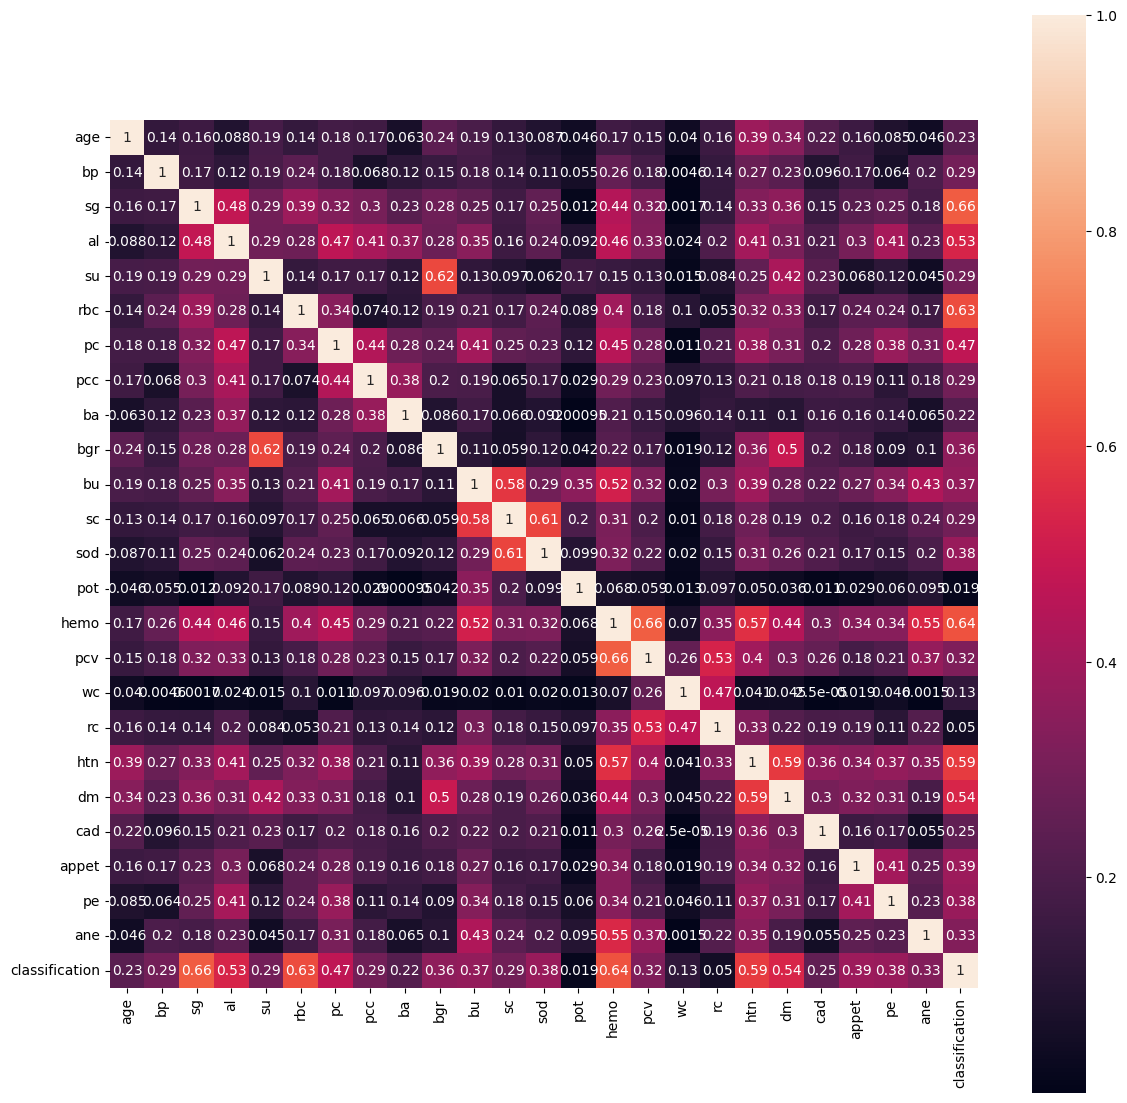

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(np.abs(df.corr()), annot=True, square=True)
plt.show()

I will take sg and hemo for decision boundary.

# **Split Dataset**

In [17]:
X = df.drop('classification', axis=1)
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scaling Dataset**

In [18]:
std_scaler = StandardScaler()

In [19]:
X_train1 = std_scaler.fit_transform(X_train)
X_test1 = std_scaler.transform(X_test)

In [20]:
mm_scaler = MinMaxScaler()

In [21]:
X_train2 = mm_scaler.fit_transform(X_train)
X_test2 = mm_scaler.transform(X_test)

In [22]:
ma_scaler = MaxAbsScaler()

In [23]:
X_train3 = ma_scaler.fit_transform(X_train)
X_test3 = ma_scaler.transform(X_test)

# **Train SVM Model 1**

In [42]:
X_trains = [X_train, X_train1, X_train2, X_train3]
X_tests  = [X_test,  X_test1,  X_test2,  X_test3]

results = pd.DataFrame(
    index=['Initial', 'standard_scaler',
          'min_max_scaler', 'max_abs_scaler'],
    columns=['score 0'])

for name, Xtr, Xte in zip(results.index, X_trains, X_tests):
  svms = [LinearSVC(), SVC(kernel='rbf'), SVC(kernel='poly'), SVC(kernel='sigmoid')]
  for i, svm in enumerate(svms):
    svm.fit(Xtr, y_train)
    results.loc[name, f'score {i}'] = svm.score(Xte, y_test)

results.T

,Initial,standard_scaler,min_max_scaler,max_abs_scaler
score 0,0.9875,0.9875,0.9625,0.975
score 1,0.8,0.9875,0.9625,0.9625
score 2,0.8125,0.9375,0.9875,0.9875
score 3,0.575,0.9875,0.9375,0.65


**Linear SVM**

Initial and StandardScaler gave the best results, while MinMaxScaler was the worst and MaxAbsScaler in between. This happens because linear SVM just finds a straight line (or hyperplane) to separate the classes. If the features are already on a similar scale, scaling doesn’t change much, which is why StandardScaler and no scaling give the same top score.

**SVM with RBF kernel**

RBF performs slightly worse on unscaled data and similarly on the other scalers, except for MaxAbsScaler, which is a bit lower. RBF relies on distances between points, so if features are on very different scales, the kernel can be distorted. That’s why scaling matters more here than for linear SVM.

**SVM with Polynomial kernel**

Polynomial SVM struggles on unscaled data and works best with MinMaxScaler or MaxAbsScaler, while StandardScaler gives worse results. The polynomial kernel is sensitive to the magnitude of features because it raises them to powers — if features are too large or too small, it can produce extreme values and hurt performance.

**SVM with Sigmoid kernel**

Sigmoid SVM performs poorly on unscaled and MaxAbs-scaled data. MinMaxScaler helps a bit, but overall, this kernel gives the weakest performance. Sigmoid behaves like a neural network activation, and it’s very sensitive to feature scale — unscaled features or large ranges can easily push the output into saturation, leading to bad classification.

In [39]:
def plot_clf(X, y, clf, ax):
  n_classes = 2
  plot_colors = "myg"
  plot_step = 0.02

  clf.fit(X, y)

  DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax=ax,
    cmap='viridis',
    response_method="predict",
    xlabel='sg',
    ylabel='hemo',
    alpha=0.4
  )

  for i, color in zip(range(n_classes), plot_colors):
    idx = (y == i)

    ax.scatter(
      X.loc[idx, 'rbc'],
      X.loc[idx, 'hemo'],
      c=color,
      label=f"type = {i}",
      edgecolor="black",
      s=30,
    )

  ax.set_title(f"{clf.__class__.__name__}", fontsize=9)
  ax.legend(fontsize=7)

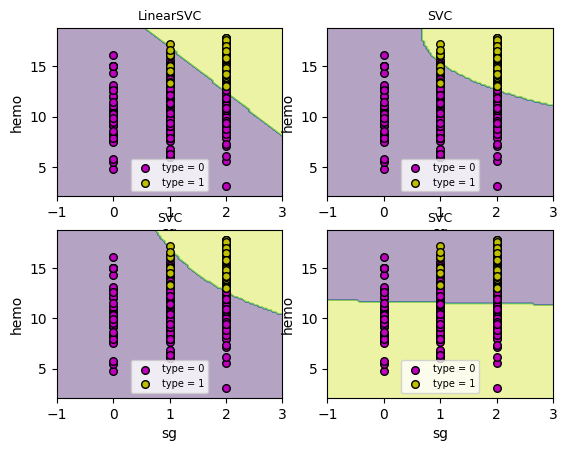

In [40]:
fig, axs = plt.subplots(ncols=2, nrows=2)

plot_clf(X[['rbc','hemo']], y, LinearSVC(), axs[0, 0])
plot_clf(X[['rbc','hemo']], y, SVC(kernel='rbf'), axs[0, 1])
plot_clf(X[['rbc','hemo']], y, SVC(kernel='poly'), axs[1, 0])
plot_clf(X[['rbc','hemo']], y, SVC(kernel='sigmoid'), axs[1, 1])

plt.show()

**Linear SVC**

It thinks that just a straight line is enough. Not complex, but ok.

**SVC with RBF kernel**

Captures more of data variability.

**SVC with polynomial kernel**

It is better than linear, but still not as good as RBF.

**SVC with sigmoid kernel**

Terribly wrong. It performs really badly, misclassifying the majority of data, again, it might be scaling issue.

In [61]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
      'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
      'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)

datasets = ['Initial', 'standard_scaler', 'min_max_scaler', 'max_abs_scaler']

for name, Xtr, Xte in zip(datasets, X_trains, X_tests):
  print(f'{name}')
  grid.fit(Xtr, y_train)
  print(f'score {grid.score(Xte, y_test)}')
  print(grid.best_estimator_, '\n')

Initial
score 0.9875
SVC(C=0.1, gamma=1, kernel='linear') 

standard_scaler
score 0.9875
SVC(C=0.1, gamma=1, kernel='linear') 

min_max_scaler
score 1.0
SVC(C=100, gamma=0.1) 

max_abs_scaler
score 0.9875
SVC(C=10, gamma=1) 



The best kernel for initial dataset is linear, the same as for data which was scaled with standard_scaler. It is interesting that it mostly values the space between the lines than the accuracy.

For other 2 scaled datasets the best option is RBF(default).
In min_max_scaler, it makes large smooth surfaces(trying to capture the data pattern), but also it values the accuracy as lot(almost certainly overfitting, because the result is 1.00 and parameters are huge/tiny).
For max_abs_scaler, it didn't change the size(diameter) of the surfaces, but still valued accuracy.